In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
url = 'https://raw.githubusercontent.com/curran/data/gh-pages/Rdatasets/csv/datasets/iris.csv';


In [3]:
col_names = ['sLength','swidth','plength','pwidth','species']
# load dataset
pima = pd.read_csv(url, header=None, names=col_names,skiprows=[0])

In [4]:
pima.head()

sLength  swidth  plength  pwidth species
1      5.1     3.5      1.4     0.2  setosa
2      4.9     3.0      1.4     0.2  setosa
3      4.7     3.2      1.3     0.2  setosa
4      4.6     3.1      1.5     0.2  setosa
5      5.0     3.6      1.4     0.2  setosa

In [5]:
feature_cols = ['sLength','swidth','plength','pwidth']
X = pima[feature_cols] # Features
y = pima.species # Target variable

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [7]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(len(y_pred),len(y_test))


45 45


In [8]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


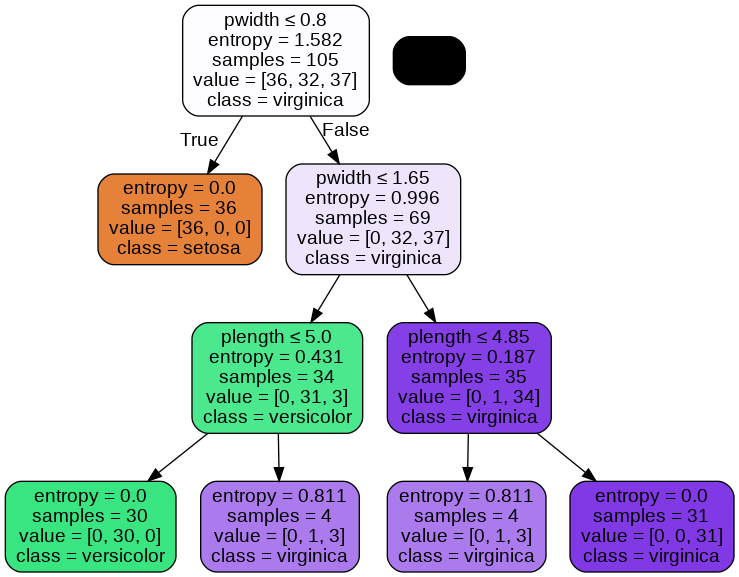

In [12]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['setosa','versicolor','virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [11]:
import six
import sys
sys.modules['sklearn.externals.six'] = six